# LAB: Workflow de Datos. Limpieza y sumarización de datos para el Desafío 3.

## Introducción

La idea de este lab es comenzar a trabajar con los datos del Desafío 3. Vamos a tratar de comenzar con el proceso de limpieza, sumarización y análisis exploratorio del dataset de Properatti. Como recordarán, el objetivo final es el desarrollo de un tasador automático a ser aplicado a las próximas propiedades que sean comercializadas por la empresa mediante un modelo de regresión. Como verán, el dataset está sumamente "sucio" y require un intenso proceos de limpieza.

El dataset contiene información referida al primer semestre de 2017 de las propiedades comercializables por la empresa:

* Fecha de creación
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m²
* Superficie cubierta en m²
* Precio en USD/m²
* Precio por m²
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto


Una vez terminada la limpieza, aquellos que se animen pueden empezar a probar algunos modelos simples de regresión.


## Objetivos de aprendizaje

* Practicar técnicas de limpieza de datos de tipo texto
* Practicar conversiones de tipo de dato
* Practicar rellenar datos faltantes con 0s o promedios
* Practicar técnicas para trabajo con datos categóricos
* Transformar datos a información útil
* Realizar un primer análisis exploratorio
* BONUS: realizar un primer modelo de regresión

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Cargar la data
df = pd.read_csv('properatti.csv')  # DATOS DE PROPIEDADES EN VENTA PROPERATI
print(df.columns)

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')


In [3]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


# Limpiar el dataset
Practiquemos nuestras capacidades para realizar limpieza de datos con el dataset de ventas de propiedades de Properatti. Si no recuerdan cómo hacer alguna de estas tareas, busquen en Internet o en clases anteriores de manipulación de datos.

Buscamos que completen las siguientes tareas:
* Quitar columnas redundantes
* Convertir las variables categóricas numéricas a integer
* Lidiar con los valores perdidos y/o erróneos en algunas variables clave: 

    + en este punto podría ser interesante realizar algo ligeramente más complejo que un simple rellenado en función de medias. Podría eventualmente imputar en función de medias condicionadas.
        * por ejemplo, los campos `lat` y `long` tienen, también, muchos casos perdidos. Quizás una estrategia posible sería tratar de imputar las coordenadas con la media de los casos en el mismo `place_name` -barrio-.
    + también podrían evaluar la posibilidad de extraer alguna información para completar los datos perdidos del campo "description" que contiene texto del aviso. 
        * por ejemplo, el campo `rooms` tiene una altísima cantidad de missing. Podrían intentar usando alguna expresión regex extraer información 

In [4]:
dfFiltrado = df[(df['state_name'] == 'Capital Federal') & ((df['place_name'] == 'Barrio Norte') | (df['place_name'] == 'Recoleta') )]
dfFiltrado.columns = ['indice', 'operacion', 'tipo_propiedad', 'barrio',
       'resumen_zona', 'pais', 'provincia', 'geonames_id',
       'latitud_longitud', 'latitud', 'longitud', 'precio', 'moneda',
       'precio_pesos', 'precio_usd', 'superficie_m2',
       'superficie_cubierta', 'precio_usd_m2', 'precio_m2', 'piso',
       'habitaciones', 'expensas', 'properati_url', 'descripcion', 'titulo',
       'imagen']

In [5]:
dfFiltrado = dfFiltrado[dfFiltrado['tipo_propiedad'] == 'apartment']

In [6]:
dfFiltrado = dfFiltrado[['barrio',
       'geonames_id',
       'latitud', 'longitud', 'precio', 'moneda',
       'precio_pesos', 'precio_usd', 'superficie_m2',
       'superficie_cubierta', 'precio_usd_m2', 'precio_m2', 'piso',
       'habitaciones', 'expensas', 'properati_url', 'descripcion', 'titulo',
       'imagen']]

In [7]:
cambio = 17.6445
valoresSinPrecio = dfFiltrado[dfFiltrado['precio_usd'].isnull()]

In [8]:
dfFiltrado.shape

(2500, 19)

In [9]:
dfFiltrado = dfFiltrado[~dfFiltrado['precio_usd'].isnull()]

In [10]:
dfFiltrado = dfFiltrado[ dfFiltrado['precio_m2'] >= dfFiltrado['precio_usd_m2']]

In [11]:
dfFiltrado[dfFiltrado['precio_m2'] < dfFiltrado['precio_usd_m2']]

,barrio,geonames_id,latitud,longitud,precio,moneda,precio_pesos,precio_usd,superficie_m2,superficie_cubierta,precio_usd_m2,precio_m2,piso,habitaciones,expensas,properati_url,descripcion,titulo,imagen


In [12]:
dfFiltrado[ dfFiltrado['precio'] != dfFiltrado['precio_usd']]

,barrio,geonames_id,latitud,longitud,precio,moneda,precio_pesos,precio_usd,superficie_m2,superficie_cubierta,precio_usd_m2,precio_m2,piso,habitaciones,expensas,properati_url,descripcion,titulo,imagen
44035,Recoleta,3429595.0,-34.592608,-58.410879,1568100.0,ARS,1551742.20,87944.81,36.0,31.0,2442.911389,50583.870968,NaN,1.0,NaN,http://www.properati.com.ar/18zkn_venta_depart...,1 AMBIENTE CON BALCÓN - BAÑO COMPLETO - COCINA...,1 Ambiente con Balcón,https://thumbs4.properati.com/9/-jVn9mTvFU9Mh8...
44038,Recoleta,3429595.0,-34.592608,-58.410879,1340900.0,ARS,1326912.27,75202.60,37.0,25.0,2032.502703,53636.000000,NaN,1.0,NaN,http://www.properati.com.ar/18zl0_venta_depart...,1 AMBIENTE CON BALCÓN - BAÑO COMPLETO - COCINA...,1 Ambiente con Balcón,https://thumbs4.properati.com/5/v7dPVfTVh64Di-...
44040,Recoleta,3429595.0,-34.592608,-58.410879,2657600.0,ARS,2629876.90,149047.97,82.0,47.0,1817.658171,56544.680851,NaN,2.0,NaN,http://www.properati.com.ar/18zl4_venta_depart...,2 AMBIENTES CON BALCÓN TERRAZA AL FRENTE - BAÑ...,2 Ambientes con Balcón Terraza al Frente,https://thumbs4.properati.com/4/n278jXgCPlISfa...
44043,Recoleta,3429595.0,-34.592608,-58.410879,2514100.0,ARS,2487873.97,140999.97,53.0,47.0,2660.376792,53491.489362,NaN,2.0,NaN,http://www.properati.com.ar/18zl8_venta_depart...,2 AMBIENTES CON BALCÓN AL FRENTE - BAÑO COMPLE...,2 Ambientes con Balcón al Frente,https://thumbs4.properati.com/4/XXDdfmKL7hOoW7...
44044,Recoleta,3429595.0,-34.592608,-58.410879,3198900.0,ARS,3165530.40,179406.07,95.0,47.0,1888.484947,68061.702128,NaN,2.0,NaN,http://www.properati.com.ar/18zla_venta_depart...,2 AMBIENTES AL FRENTE CON TERRAZA EXCLUSIVA - ...,2 Ambientes al Frente con Terraza Exclusiva,https://thumbs4.properati.com/8/C8LsLcWjzmbQUA...
44045,Recoleta,3429595.0,-34.592608,-58.410879,1845000.0,ARS,1825753.69,103474.38,56.0,26.0,1847.756786,70961.538462,NaN,1.0,NaN,http://www.properati.com.ar/18zlb_venta_depart...,1 AMBIENTE AL CONTRAFRENTE CON TERRAZA EXCLUSI...,1 Ambiente al Contrafrente con Terraza Exclusiva,https://thumbs4.properati.com/8/14iYmvuZ_V3wpL...
44664,Recoleta,3429595.0,-34.601159,-58.398106,1600537.0,ARS,1583840.72,89763.99,60.0,30.0,1496.066500,53351.233333,NaN,1.0,NaN,http://www.properati.com.ar/19112_venta_depart...,1 AMBIENTE CON PATIO AL CONTRAFRENTE - BAÑO CO...,1 Ambiente con Patio al Contrafrente,https://thumbs4.properati.com/3/NsxpshxmG7wacP...
44665,Recoleta,3429595.0,-34.601159,-58.398106,1492026.0,ARS,1476461.76,83678.30,57.0,27.0,1468.040351,55260.222222,NaN,1.0,NaN,http://www.properati.com.ar/19117_venta_depart...,1 AMBIENTE CON PATIO AL CONTRAFRENTE - BAÑO CO...,1 Ambiente con Patio al Contrafrente,https://thumbs4.properati.com/9/EZwlKngJ19NCaI...
44666,Recoleta,3429595.0,-34.601159,-58.398106,2218764.0,ARS,2195618.76,124436.44,51.0,42.0,2439.930196,52827.714286,NaN,2.0,NaN,http://www.properati.com.ar/1911a_venta_depart...,1 AMBIENTE CON PATIO AL CONTRAFRENTE - BAÑO CO...,2 Ambientes con Balcón al Frente,https://thumbs4.properati.com/5/N4649fSUBNMqvN...
44669,Recoleta,3429595.0,-34.601159,-58.398106,2313180.0,ARS,2289049.74,129731.63,51.0,42.0,2543.757451,55075.714286,NaN,2.0,NaN,http://www.properati.com.ar/1911e_venta_depart...,1 AMBIENTE CON PATIO AL CONTRAFRENTE - BAÑO CO...,2 Ambientes con Balcón al Frente,https://thumbs4.properati.com/4/Mp6ComWGKTKJTq...


In [13]:
dfFiltrado = dfFiltrado[['barrio', 'geonames_id', 'latitud', 'longitud', 'precio_usd', 'superficie_m2', 'superficie_cubierta',
       'precio_usd_m2', 'piso', 'habitaciones', 'expensas',
       'properati_url', 'descripcion', 'titulo', 'imagen']]

In [14]:
dfFiltrado['precio_usd_m2_calculado'] = dfFiltrado['precio_usd'] / dfFiltrado['superficie_m2']

In [15]:
(dfFiltrado['precio_usd_m2'].astype(int) == dfFiltrado['precio_usd_m2_calculado'].astype(int)).value_counts()

True    1870
dtype: int64

In [16]:
dfFiltrado.drop('precio_usd_m2_calculado', axis=1, inplace = True)

In [17]:
pd.set_option('display.max_colwidth', 50)
dfFiltrado[dfFiltrado['descripcion'].str.lower().str.contains('al frente')]['descripcion']

200       Los equipos de aire acondicionado no estan inc...
227       Espectacular ubicación, al frente orientación ...
412       2º piso al frente con balcón y grandes ventana...
697       VENTA DEPARTAMENTO 2 AMBIENTES BARRIO NORTEImp...
712       Venta de Departamento 3 AMBIENTES en Barrio No...
1134      Excelente piso de categoría al frente, con  de...
1142      Excelente piso antiguo. Pisos de parquet de ro...
1143      Excelente piso antiguo de estilo racionalista,...
1166      Lindisimo piso, en la mejor zona de Recoleta, ...
1309      Semipiso al frente, living comedor a balcón co...
1371      Edificio de categoría, frente al Hotel Alvear,...
1533      CODIGO: 572-2515 ubicado en: Pacheco de Melo 2...
4314      Piso único con gran recepción, comedor y escri...
4668      -Departamento  de 88m2 y 82m2 cubiertos, al fr...
5243      CERCA DE PARQUE LAS HERAS Y JARDÍN BOTÁNICO, E...
5440      Muy lindo departamento de 4 ambientes en muy b...
5500      Semi piso muy luminoso y con r

In [18]:
dfFiltrado.shape

(1870, 15)

In [19]:
dfFiltrado = dfFiltrado.drop_duplicates(subset='descripcion')

In [20]:
dfFiltrado.columns

Index(['barrio', 'geonames_id', 'latitud', 'longitud', 'precio_usd',
       'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'piso',
       'habitaciones', 'expensas', 'properati_url', 'descripcion', 'titulo',
       'imagen'],
      dtype='object')

In [21]:
# Cargar la data de distancias
dfFiltrado = pd.read_csv("dfFiltradoconsubteypuntoscompl.csv")  # DATOS DE PROPIEDADES EN VENTA PROPERATI

In [22]:
dfFiltrado = dfFiltrado[['barrio', 'geonames_id', 'latitud',
       'longitud', 'precio_usd', 'superficie_m2', 'superficie_cubierta',
       'precio_usd_m2', 'piso', 'habitaciones', 'expensas', 'properati_url',
       'descripcion', 'titulo', 'imagen', 'geom_x',
       'estacion_mas_cercanan_x', 'dist_estacion_mas_cercana_x',
       'estacion_mas_cercanap_x', 'distiso500_100', 'distiso1000_100',
       'isopuntosimp2000_200', 'punto_mas_cercanan', 'dist_punto_mas_cercana',
       'punto_mas_cercanap', 'subtegoo_x', 'subtegoo_y', 'puntosgoo','puntosgoo2']]

In [23]:
pd.set_option('display.max_colwidth', -1)
dfFiltrado['frente'] = dfFiltrado['descripcion'].str.lower().str.contains('al frente').apply(lambda x: 1 if x == True else 0)

In [24]:
dfFiltrado['frente'].value_counts()

0    954
1    392
Name: frente, dtype: int64

In [25]:
dfFiltrado['descripcion'].str.lower().str.contains('contrafrente').value_counts()
dfFiltrado['descripcion'].str.lower().str.contains('al frente').value_counts()

dfFiltrado[dfFiltrado['titulo'].str.lower().str.contains('al frente')]['frente']

0       1
61      1
79      1
96      0
98      1
115     1
154     1
161     1
164     0
171     0
182     0
195     1
196     1
200     1
210     1
235     1
260     1
351     1
355     1
368     1
369     1
370     1
377     0
386     1
394     1
400     1
426     1
427     1
433     1
465     1
       ..
779     1
794     1
808     1
818     0
843     0
844     1
873     1
882     1
894     1
895     1
902     1
906     0
910     1
911     1
930     1
934     1
946     1
999     0
1020    1
1125    0
1149    1
1262    1
1263    0
1278    0
1286    1
1317    1
1318    0
1319    0
1320    0
1333    1
Name: frente, Length: 80, dtype: int64

In [26]:
dfFiltrado['titulo'].str.lower().str.contains('al frente') | dfFiltrado['descripcion'].str.lower().str.contains('al frente')

0       True 
1       True 
2       False
3       False
4       True 
5       False
6       False
7       False
8       False
9       False
10      True 
11      False
12      False
13      True 
14      False
15      False
16      True 
17      True 
18      False
19      True 
20      False
21      False
22      False
23      False
24      False
25      True 
26      False
27      False
28      False
29      True 
        ...  
1316    False
1317    True 
1318    True 
1319    True 
1320    True 
1321    False
1322    False
1323    False
1324    False
1325    True 
1326    True 
1327    True 
1328    False
1329    False
1330    True 
1331    False
1332    False
1333    True 
1334    False
1335    False
1336    True 
1337    False
1338    False
1339    True 
1340    True 
1341    False
1342    False
1343    True 
1344    False
1345    True 
Length: 1346, dtype: bool

In [27]:
dfFiltrado['frente'] = (dfFiltrado['titulo'].str.lower().str.contains(' frente') | dfFiltrado['descripcion'].str.lower().str.contains(' frente')).apply(lambda x: 1 if x == True else 0)
dfFiltrado[dfFiltrado['titulo'].str.lower().str.contains('al frente')]['frente']

0       1
61      1
79      1
96      1
98      1
115     1
154     1
161     1
164     1
171     1
182     1
195     1
196     1
200     1
210     1
235     1
260     1
351     1
355     1
368     1
369     1
370     1
377     1
386     1
394     1
400     1
426     1
427     1
433     1
465     1
       ..
779     1
794     1
808     1
818     1
843     1
844     1
873     1
882     1
894     1
895     1
902     1
906     1
910     1
911     1
930     1
934     1
946     1
999     1
1020    1
1125    1
1149    1
1262    1
1263    1
1278    1
1286    1
1317    1
1318    1
1319    1
1320    1
1333    1
Name: frente, Length: 80, dtype: int64

In [28]:
dfFiltrado['frente'].value_counts()

0    810
1    536
Name: frente, dtype: int64

In [29]:
dfFiltrado[dfFiltrado['descripcion'].str.lower().str.contains(' frente')]['descripcion']

0       Los equipos de aire acondicionado no estan incluidos en el precio de venta.Semipiso. Living. Comedor. 4 dormitorio(s) 1 en suite. 2 baño(s) 1 toilette(s). Entre medianeras. Al frente. S/av. principal.  Antiguo.  Luminoso.  En muy buen estado. Orientación Suroeste. Antigüedad 80 años.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [30]:
dfFiltrado.shape

(1346, 30)

In [31]:
dfFiltrado.columns

Index(['barrio', 'geonames_id', 'latitud', 'longitud', 'precio_usd',
       'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'piso',
       'habitaciones', 'expensas', 'properati_url', 'descripcion', 'titulo',
       'imagen', 'geom_x', 'estacion_mas_cercanan_x',
       'dist_estacion_mas_cercana_x', 'estacion_mas_cercanap_x',
       'distiso500_100', 'distiso1000_100', 'isopuntosimp2000_200',
       'punto_mas_cercanan', 'dist_punto_mas_cercana', 'punto_mas_cercanap',
       'subtegoo_x', 'subtegoo_y', 'puntosgoo', 'puntosgoo2', 'frente'],
      dtype='object')

In [32]:
dfFiltrado.drop_duplicates(subset=['barrio', 'precio_usd',
       'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'piso',
       'habitaciones', 'frente']).shape

(1346, 30)

In [33]:
dfFiltrado = dfFiltrado.drop_duplicates(subset=['barrio', 'precio_usd',
       'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'piso',
       'habitaciones', 'frente'])

In [34]:
dfFiltrado['de_lujo'] = (dfFiltrado['descripcion'].str.lower().str.contains('amenities') | dfFiltrado['descripcion'].str.lower().str.contains('pileta') | dfFiltrado['descripcion'].str.lower().str.contains('parrilla') | dfFiltrado['descripcion'].str.lower().str.contains('gimnasio') | dfFiltrado['descripcion'].str.lower().str.contains(' sum ') | dfFiltrado['descripcion'].str.lower().str.contains('piscina') | dfFiltrado['descripcion'].str.lower().str.contains('solarium') | dfFiltrado['descripcion'].str.lower().str.contains('quincho') | dfFiltrado['titulo'].str.lower().str.contains('amenities') | dfFiltrado['titulo'].str.lower().str.contains('pileta') | dfFiltrado['titulo'].str.lower().str.contains('parrilla') | dfFiltrado['titulo'].str.lower().str.contains('gimnasio') | dfFiltrado['titulo'].str.lower().str.contains(' sum ') | dfFiltrado['titulo'].str.lower().str.contains('piscina') | dfFiltrado['titulo'].str.lower().str.contains('solarium') | dfFiltrado['titulo'].str.lower().str.contains('quincho')).apply(lambda x: 1 if x == True else 0)

In [35]:
dfFiltrado['de_lujo'].value_counts()

0    1073
1    273 
Name: de_lujo, dtype: int64

In [36]:
dfFiltrado['balcon'] = (dfFiltrado['descripcion'].str.lower().str.contains('balcon') | dfFiltrado['descripcion'].str.lower().str.contains('balcón')).apply(lambda x: 1 if x == True else 0)

In [37]:
dfFiltrado['balcon'].value_counts()

0    707
1    639
Name: balcon, dtype: int64

In [38]:
dfFiltrado['apto_profesional'] = (dfFiltrado['descripcion'].str.lower().str.contains('apto profesional') | dfFiltrado['titulo'].str.lower().str.contains('apto profesional') | dfFiltrado['descripcion'].str.lower().str.contains('profesional') | dfFiltrado['titulo'].str.lower().str.contains('profesional')).apply(lambda x: 1 if x == True else 0)

In [39]:
dfFiltrado['apto_profesional'].value_counts()

0    1086
1    260 
Name: apto_profesional, dtype: int64

In [40]:
dfFiltrado.shape

(1346, 33)

In [41]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('primer piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('1º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('1er piso')).apply(lambda x: 1 if x == True else np.nan)

In [42]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('segundo piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('2º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('2do piso')).apply(lambda x: 2 if x == True else np.nan)

In [43]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('tercer piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('3º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('3er piso')).apply(lambda x: 3 if x == True else np.nan)

In [44]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('cuarto piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('4º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('4to piso')).apply(lambda x: 4 if x == True else np.nan)

In [45]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('quinto piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('5º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('5to piso')).apply(lambda x: 5 if x == True else np.nan)

In [46]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('sexto piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('6º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('6to piso')).apply(lambda x: 6 if x == True else np.nan)

In [47]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('séptimo piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('7º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('7mo piso')).apply(lambda x: 7 if x == True else np.nan)

In [48]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('octavo piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('8º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('8vo piso')).apply(lambda x: 8 if x == True else np.nan)

In [49]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('noveno piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('9º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('9no piso')).apply(lambda x: 9 if x == True else np.nan)

In [50]:
dfFiltrado.loc[np.isnan(dfFiltrado['piso']),'piso'] = (dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('décimo piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('10º piso') | dfFiltrado[np.isnan(dfFiltrado['piso'])]['descripcion'].str.lower().str.contains('10mo piso')).apply(lambda x: 10 if x == True else np.nan)

In [51]:
dfFiltrado['habitaciones'].value_counts()

4.0     236
3.0     180
1.0     156
5.0     139
2.0     122
6.0     63 
7.0     27 
8.0     15 
12.0    5  
10.0    3  
9.0     2  
Name: habitaciones, dtype: int64

In [52]:
dfFiltrado.loc[np.isnan(dfFiltrado['habitaciones']),'habitaciones'] = (dfFiltrado[np.isnan(dfFiltrado['habitaciones'])]['descripcion'].str.lower().str.contains('monoambiente') | dfFiltrado[np.isnan(dfFiltrado['habitaciones'])]['descripcion'].str.lower().str.contains('mono-ambiente')).apply(lambda x: 1 if x == True else np.nan)

In [53]:
for i in range(2, 10):
    dfFiltrado.loc[np.isnan(dfFiltrado['habitaciones']),'habitaciones'] = (dfFiltrado[np.isnan(dfFiltrado['habitaciones'])]['descripcion'].str.lower().str.contains(str(i) + ' habitaciones') | dfFiltrado[np.isnan(dfFiltrado['habitaciones'])]['descripcion'].str.lower().str.contains(str(i) + ' ambientes')).apply(lambda x: i if x == True else np.nan)

In [54]:
dfFiltrado['habitaciones'].value_counts()

4.0     276
3.0     216
1.0     208
2.0     162
5.0     146
6.0     64 
7.0     27 
8.0     15 
12.0    5  
10.0    3  
9.0     2  
Name: habitaciones, dtype: int64

In [55]:
tamanioMedioAmbiente = (dfFiltrado[~np.isnan(dfFiltrado['habitaciones'])]['superficie_m2'] / dfFiltrado[~np.isnan(dfFiltrado['habitaciones'])]['habitaciones']).mean()

In [56]:
dfFiltrado.loc[np.isnan(dfFiltrado['habitaciones']),'habitaciones'] = (dfFiltrado[np.isnan(dfFiltrado['habitaciones'])]['superficie_m2'] / tamanioMedioAmbiente).astype(int)

In [57]:
dfFiltrado['habitaciones'].shape

(1346,)

In [58]:
pd.set_option('display.max_colwidth', 10)
dfFiltrado.shape

(1346, 33)

# Filtrar los Datos

En general, los mdoelos de precios suelen tener un carácter local. Es por eso que deberán elegir alguna zona o provincia para trabajar y estimar el modelo en base a dicha selección.

In [59]:
# Filtrar la zona elegida para estimar el modelo

dfFiltrado.columns

Index(['barrio', 'geonames_id', 'latitud', 'longitud', 'precio_usd',
       'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'piso',
       'habitaciones', 'expensas', 'properati_url', 'descripcion', 'titulo',
       'imagen', 'geom_x', 'estacion_mas_cercanan_x',
       'dist_estacion_mas_cercana_x', 'estacion_mas_cercanap_x',
       'distiso500_100', 'distiso1000_100', 'isopuntosimp2000_200',
       'punto_mas_cercanan', 'dist_punto_mas_cercana', 'punto_mas_cercanap',
       'subtegoo_x', 'subtegoo_y', 'puntosgoo', 'puntosgoo2', 'frente',
       'de_lujo', 'balcon', 'apto_profesional'],
      dtype='object')

In [60]:
dfAuxiliar = dfFiltrado[['latitud', 'longitud', 'superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 
                        'habitaciones',
       'dist_estacion_mas_cercana_x', 
       'distiso500_100', 'distiso1000_100', 'isopuntosimp2000_200',
       'dist_punto_mas_cercana', 'subtegoo_y','puntosgoo2','puntosgoo',
        'frente', 'de_lujo', 'balcon',
       'apto_profesional']]

In [61]:
dfFiltrado = dfAuxiliar[['superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 
                        'habitaciones',
       'dist_estacion_mas_cercana_x', 
       'distiso500_100', 'distiso1000_100', 'isopuntosimp2000_200',
       'dist_punto_mas_cercana', 'subtegoo_y','puntosgoo2','puntosgoo',
        'frente', 'de_lujo', 'balcon',
       'apto_profesional']]

In [62]:
dfFiltrado = dfFiltrado[dfFiltrado['subtegoo_y']%1==0]
dfFiltrado = dfFiltrado[dfFiltrado['puntosgoo2']%1==0]

In [63]:
dfFiltrado[dfFiltrado["precio_usd_m2"]<600].shape

(3, 16)

In [64]:
dfFiltrado = dfFiltrado[dfFiltrado["precio_usd_m2"]>600]


In [65]:
dfFiltrado.columns

Index(['superficie_m2', 'superficie_cubierta', 'precio_usd_m2', 'habitaciones',
       'dist_estacion_mas_cercana_x', 'distiso500_100', 'distiso1000_100',
       'isopuntosimp2000_200', 'dist_punto_mas_cercana', 'subtegoo_y',
       'puntosgoo2', 'puntosgoo', 'frente', 'de_lujo', 'balcon',
       'apto_profesional'],
      dtype='object')

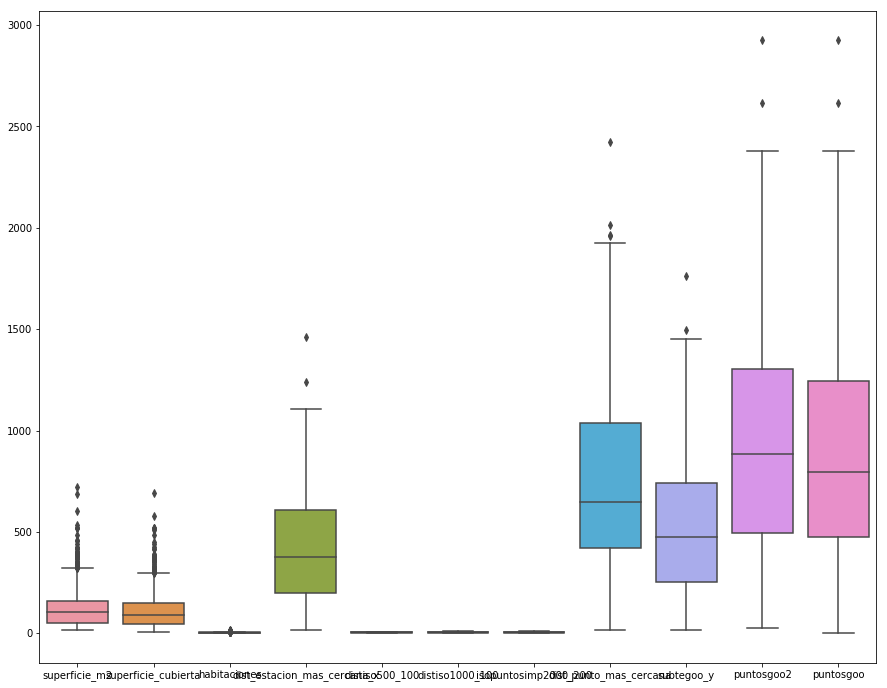

In [66]:
plt.rcParams["figure.figsize"] = [15.0, 12.0]
sns.boxplot(data=dfFiltrado.loc[:, dfFiltrado.columns != 'precio_usd_m2'].iloc[:,:-4])

In [67]:
#SEPARO TRAIN Y TEST
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
X = dfFiltrado.loc[:, dfFiltrado.columns != 'precio_usd_m2']

In [69]:
X = StandardScaler().fit_transform(X)

In [70]:
#X = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(X)

In [71]:
y = dfFiltrado['precio_usd_m2']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(817, 15) (817,)
(351, 15) (351,)


In [73]:

al_ridge = np.linspace(0.001, 0.3, 300)
al_lasso = np.linspace(0.1, 0.8, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=53)


lm = LinearRegression()
lmRidgeCV = RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
lmLassoCV = LassoCV(alphas=al_lasso, cv=kf, normalize=False)

#lm = LinearRegression()
#lmRidgeCV = RidgeCV(cv=5, normalize=False)
#lmLassoCV = LassoCV(cv=5, normalize=False)

In [74]:
lmRidgeCV

RidgeCV(alphas=array([0.001, 0.002, ..., 0.299, 0.3  ]),
    cv=KFold(n_splits=5, random_state=53, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [75]:
lm.fit(X_train, y_train)
lmRidgeCV.fit(X_train, y_train)
lmLassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.1    , 0.10234, ..., 0.79766, 0.8    ]), copy_X=True,
    cv=KFold(n_splits=5, random_state=53, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [76]:
print('Alpha Ridge:',lmRidgeCV.alpha_,'\n'
      'Alpha LASSO:',lmLassoCV.alpha_,'\n')

Alpha Ridge: 0.3 
Alpha LASSO: 0.8 



In [77]:
# Calculamos el R2

print("Score Train Lineal:", lm.score(X_train, y_train),"\n"
      "Score Train Ridge:",  lmRidgeCV.score(X_train, y_train),"\n"
      "Score Train Lasso:",  lmLassoCV.score(X_train, y_train))

# Calculamos el MSE

lmpred_Tr = lm.predict(X_train)
lmRidgepred_Tr = lmRidgeCV.predict(X_train)
lmLassoepred_Tr = lmLassoCV.predict(X_train)

print("Train MSE lineal=", mean_squared_error(y_train,lmpred_Tr), "\n"
      "Train MSE Ridge=",  mean_squared_error(y_train,lmRidgepred_Tr), "\n"
      "Train MSE Lasso=",  mean_squared_error(y_train,lmLassoepred_Tr))

print("R2=", r2_score(y_train,lmpred_Tr), "\n"
      "R2=",  r2_score(y_train,lmRidgepred_Tr), "\n"
      "R2=",  r2_score(y_train,lmLassoepred_Tr))

Score Train Lineal: 0.2600737172438843 
Score Train Ridge: 0.26005789535433355 
Score Train Lasso: 0.2597802511326749
Train MSE lineal= 607784.538873362 
Train MSE Ridge= 607797.5351678156 
Train MSE Lasso= 608025.595542429
R2= 0.2600737172438843 
R2= 0.26005789535433355 
R2= 0.2597802511326749


In [78]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

lmpred_Te = lm.predict(X_test)
lmRidgepred_Te = lmRidgeCV.predict(X_test)
lmLassoepred_Te = lmLassoCV.predict(X_test)

# Testeo final del modelo sobre Test Set

print("MSE lineal=", mean_squared_error(y_test,lmpred_Te), "\n"
      "MSE Ridge=",  mean_squared_error(y_test,lmRidgepred_Te), "\n"
      "MSE Lasso=",  mean_squared_error(y_test,lmLassoepred_Te))

print("R2=", r2_score(y_test,lmpred_Te), "\n"
      "R2=",  r2_score(y_test,lmRidgepred_Te), "\n"
      "R2=",  r2_score(y_test,lmLassoepred_Te))

MSE lineal= 599363.8553205946 
MSE Ridge= 599907.5725453256 
MSE Lasso= 600984.628577429
R2= 0.31545289391617404 
R2= 0.31483190209390544 
R2= 0.3136017718761396


In [79]:
lmRidgepred_Te.mean()

3061.9715703856587

In [80]:
lmpred_Te.mean()

3061.698923318569

In [81]:
lmLassoepred_Te.mean()

3063.4068307156263

In [82]:
y_test.mean()

3046.846538137672

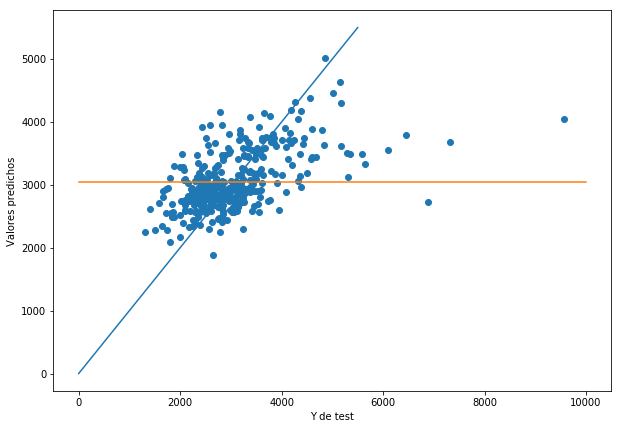

In [83]:
plt.rcParams["figure.figsize"] = [10.0, 7.0]
plt.scatter(y_test,lmpred_Te)
plt.xlabel("Y de test")
plt.ylabel("Valores predichos")
plt.plot([0,5500],[0,5500])
plt.plot([0,10000],[np.mean(y_test),np.mean(y_test)])
plt.show()


In [84]:
r2_score(y_test,lmpred_Te)

0.31545289391617404

In [85]:
(lmLassoCV.intercept_,lmLassoCV.coef_)

(3107.1834731416516,
 array([-582.5790483 ,  711.00875973, -199.23072462, -196.95301381,
        -386.17313342,  633.51549813,  421.40064389,    0.        ,
         111.77825054,  -44.87089843, -590.5069629 ,  -16.86754906,
         265.76010945,   35.77762474,  -66.1947611 ]))

# Análisis exploratorio

Como estamos intentando predecir precios por metro cuadrado es importante realizar una primera vista y exploración de los datos.

In [86]:
# Calculo de correlacion entre features


In [87]:
# Analisis exploratorio, graficos...


¿En qué barrios los precios por $m^2$ son más altos? 

¿En qué barrios hay una mayor cantidad de viviendas para su venta?

¿ En qué barrios hay una mayor dispersión de precios?

¿Qué tipo de propiedad presenta los mayores precios? ¿Cuál las mayores dispersiones?

Continua realizando un análisis exploratorio del dataset...

## BONUS: Empezando con regresiones lineales...

Si se atreven, podrían empezar a probar con algunos modelos de regresión no demasiado sofisticados. Seleccionen (o construyan) su variable dependiente ($Y$) y comiencen probando con pocas variables y modelos sencillos.

Usen el estimador `LinearRegression` de submódulo `sklearn.linear_model`.

Recuerden los pasos para comenzar a trabajar con estimadores en Scikit-Learn.
    
1. Elegir una clase de modelo importando la clase de estimador apropiado de Scikit-Learn.
2. Seleccionar los hiperparámetros del modelo instanciando la clase con los valores deseados.
3. Preparar los datos en una matriz de features y un array target, como vimos previamente.
4. Ajustar el modelo a los datos invocando el método fit() de la instancia del modelo.
5. Aplicar el modelo a nuevos datos:
    * Para aprendizaje supervisado, frecuentemente predecimos labels para datos nuevos usando el método predict()
    * Para aprendizaje no supervisado, frecuentemente transformamos o inferimos propiedades de los datos usando los métodos transform() o predict()
    
¿Qué pueden decir del ajuste y la capacidad predictiva de sus modelos?

In [88]:
from sklearn.linear_model import LinearRegression